In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

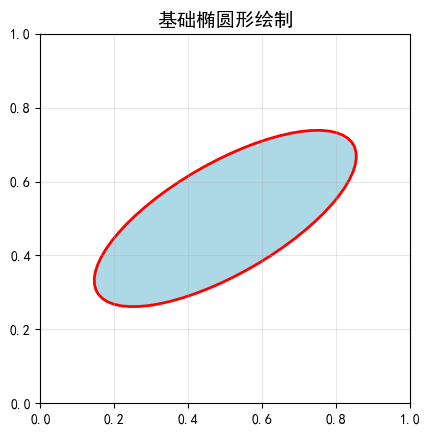

In [3]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()

# 创建椭圆对象
ellipse = Ellipse(
    xy=(0.5, 0.5),          # 中心坐标
    width=0.8,              # 长轴长度
    height=0.3,             # 短轴长度
    angle=30,               # 旋转角度
    facecolor='lightblue',  # 填充色
    edgecolor='red',        # 边框色
    linewidth=2             # 边框宽度
)

# 添加椭圆形到坐标轴
ax.add_patch(ellipse)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')  # 保证x、y轴比例一致，避免椭圆形变形
plt.title('基础椭圆形绘制', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

# 2、使用示例：

### 示例 1：建立和编辑椭圆对象

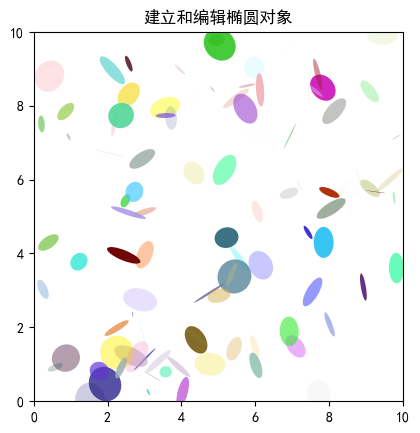

In [4]:
from matplotlib.patches import Ellipse

np.random.seed(10)
num = 100  
# 生成100个随机椭圆的列表
ells = [Ellipse(xy=np.random.rand(2) * 10, 
                width=np.random.rand(), 
                height=np.random.rand(),
                angle=np.random.rand() * 360) for i in range(num)]

fig, axes = plt.subplots(subplot_kw={'aspect': 'equal'})
# 遍历所有椭圆对象并添加到子图中
for e in ells:
    axes.add_artist(e) 
    e.set_clip_box(axes.bbox)           # 设置椭圆的裁剪区域为子图的边界框，防止椭圆超出显示区域
    e.set_alpha(np.random.rand())       # 设置椭圆的透明度
    e.set_facecolor(np.random.rand(3))  # 设置椭圆的填充颜色

axes.set_xlim(0, 10)
axes.set_ylim(0, 10)
axes.set_title('建立和编辑椭圆对象')
plt.show()

### 示例 2：绘制置信椭圆

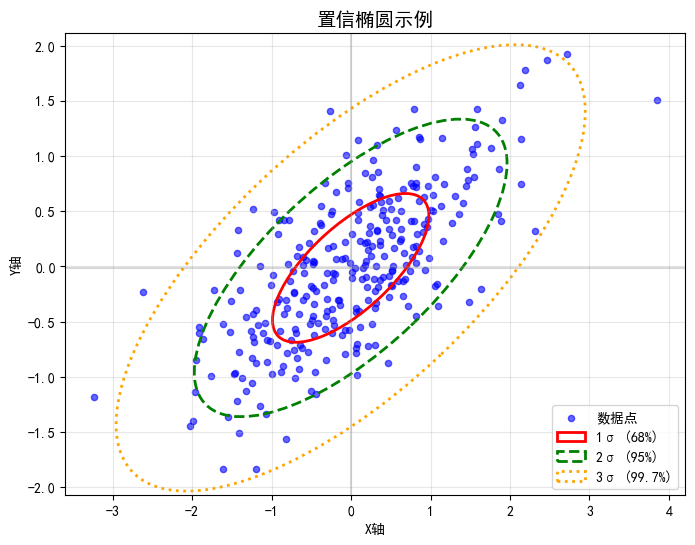

In [5]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=1.0, facecolor='none', **kwargs):
    """
    创建置信椭圆
    
    参数:
    x, y : 数据点的坐标
    ax : matplotlib轴对象
    n_std : 标准差倍数 (1σ=68%, 2σ=95%, 3σ=99.7%)
    facecolor : 填充颜色
    **kwargs : 其他椭圆参数
    """
    # 计算协方差矩阵
    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    
    # 计算椭圆参数
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    
    # 创建椭圆
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)
    
    # 计算变换
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)
    
    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

# 示例数据
np.random.seed(42)
x = np.random.normal(0, 1, 300)
y = 0.5 * x + np.random.normal(0, 0.5, 300)

# 绘制散点图和置信椭圆
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, s=20, alpha=0.6, c='blue', label='数据点')

# 绘制不同置信水平的椭圆
confidence_ellipse(x, y, ax, n_std=1, edgecolor='red', 
                  linewidth=2, label='1σ (68%)')
confidence_ellipse(x, y, ax, n_std=2, edgecolor='green', 
                  linewidth=2, linestyle='--', label='2σ (95%)')
confidence_ellipse(x, y, ax, n_std=3, edgecolor='orange', 
                  linewidth=2, linestyle=':', label='3σ (99.7%)')

ax.axhline(y=np.mean(y), color='gray', linestyle='-', alpha=0.3)
ax.axvline(x=np.mean(x), color='gray', linestyle='-', alpha=0.3)
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_title('置信椭圆示例', fontsize=14)
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

### 示例 3：创建椭圆集合

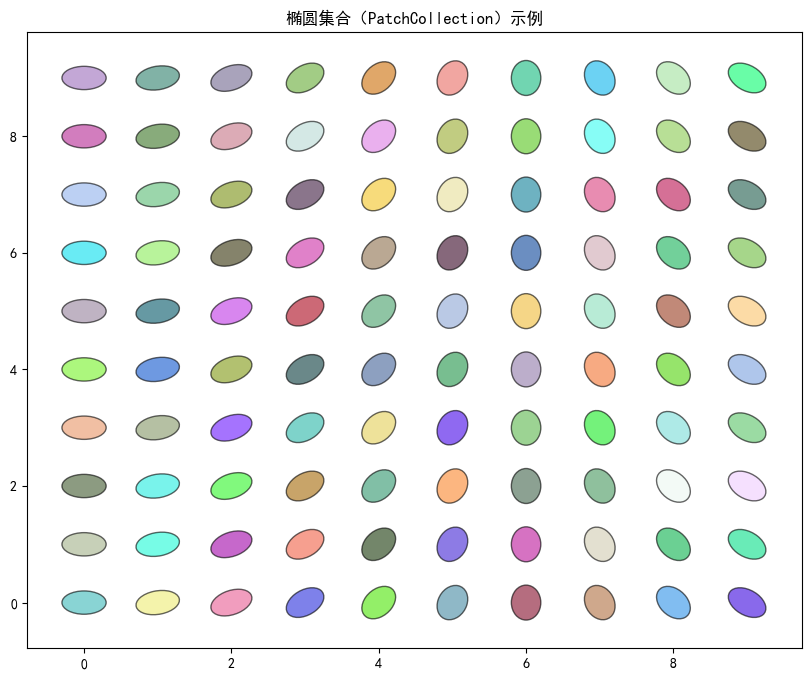

In [6]:
from matplotlib.collections import PatchCollection

# 创建多个椭圆
ellipses = []
for i in range(10):
    for j in range(10):
        ellipse = Ellipse(xy=(i, j), 
                                 width=0.6, 
                                 height=0.4, 
                                 angle=i*15)
        ellipses.append(ellipse)

# 创建椭圆集合
collection = PatchCollection(ellipses, alpha=0.6, 
                            edgecolor='black', 
                            facecolor=np.random.rand(len(ellipses), 3))

fig, ax = plt.subplots(figsize=(10, 8))
ax.add_collection(collection)
ax.autoscale_view()

plt.title('椭圆集合（PatchCollection）示例')
plt.show()